## Packages

In [413]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscalor
from sklearn.preprocessing import StandardScaler

from plotnine import (ggplot, aes, geom_line, geom_point, geom_hline, geom_text,
                     theme_bw, theme, element_text, labs, theme_classic)


In [251]:
root_path = "../../Data/GoogleDrive/MLP_Results/"
baseline = pd.read_parquet(root_path + 'test_results-baseline.parquet')
result_2 = pd.read_parquet(root_path + 'test_results_lego_2-Under_Sample_1:1_threshold_20.parquet')
result_3 = pd.read_parquet(root_path + 'test_results_best_lego_3_2-Under_Sample_1:1_threshold_20.parquet')
result_4 = pd.read_parquet(root_path + 'test_results_best_lego_4_2-Under_Sample_1:1_threshold_20.parquet')
result_5 = pd.read_parquet(root_path + 'test_results_best_lego_5_2-Under_Sample_1:1_threshold_20.parquet')
result_6 = pd.read_parquet(root_path + 'test_results_best_lego_6_2-Under_Sample_1:1_threshold_20.parquet')
result_7 = pd.read_parquet(root_path + 'test_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
result_8 = pd.read_parquet(root_path + 'test_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')


In [252]:
train_7 = pd.read_parquet(root_path + 'grid_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
train_8 = pd.read_parquet(root_path + 'grid_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')

In [36]:
train_7

,Dataset_Name,Grid_Variable,Parameters,Recall,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_lego_7_3,"{'activation': 'logistic', 'batch_size': 100, ...",0.891679,223.866392


In [37]:
result_7

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_lego_7_3,"{'activation': 'logistic', 'batch_size': 100, ...",0.777173,0.817858,0.716146,223.866392


In [38]:
train_8

,Dataset_Name,Grid_Variable,Parameters,Recall,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_lego_8_3,"{'activation': 'logistic', 'alpha': 0.0, 'batc...",0.878161,227.727516


In [39]:
result_8

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_lego_8_3,"{'activation': 'logistic', 'alpha': 0.0, 'batc...",0.736499,0.817038,0.741965,227.727516


In [253]:
# put all results in a dataframe
results = pd.concat([baseline, result_2, result_3, result_4, result_5, result_6, result_7, result_8])
results.reset_index(drop=True, inplace=True)

In [254]:
results['step'] = results.index

In [61]:
results

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time,step
0,Under_Sample_1:1_threshold_20,baseline,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.752738,0.814254,0.732085,67.248320,1
1,Under_Sample_1:1_threshold_20,_lego_2,"{'hidden_layer_sizes': [47, 46, 46, 46], 'solv...",0.721486,0.788470,0.740800,347.986998,2
2,Under_Sample_1:1_threshold_20,_best_lego_3_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.738414,0.773968,0.722578,387.493518,3
3,Under_Sample_1:1_threshold_20,_best_lego_4_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.757258,0.807951,0.719266,150.594047,4
4,Under_Sample_1:1_threshold_20,_best_lego_5_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.759862,0.809474,0.718147,134.959114,5
5,Under_Sample_1:1_threshold_20,_best_lego_6_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.766067,0.804127,0.710541,185.055771,6
6,Under_Sample_1:1_threshold_20,_best_lego_7_3,"{'activation': 'logistic', 'batch_size': 100, ...",0.777173,0.817858,0.716146,223.866392,7
7,Under_Sample_1:1_threshold_20,_best_lego_8_3,"{'activation': 'logistic', 'alpha': 0.0, 'batc...",0.736499,0.817038,0.741965,227.727516,8


### Expected input 

A dataframe with the following columns:
- `model`: the name of the model used 
- `parameters`: the parameters used in the grid search
- `test_score`: the test score of the best CV model (which will be recall


In [62]:
# synthetic data created to test the plotting functions
# generate test scores from tuning the hyperparameters for the MLP model
# the test scores are around 70 - 80

scores = pd.DataFrame({
    'model_name': ['MLP'] * 10,
    'hyperparameters': ['hidden_layer_sizes', 'activation', 'solver', 'alpha', 
                        'batch_size', 'learning_rate', 'max_iter', 'early_stopping', 
                        'validation_fraction', 'beta_1'],
    'test_score': np.random.randint(70, 80, 10)
})

# sort by test score
scores = scores.sort_values('test_score', ascending=True)

baseline = pd.DataFrame({
    'model_name': ['MLP'],
    'hyperparameters': ['baseline'],
    'test_score': [np.random.randint(70, 80)],
})

scores = pd.concat([baseline, scores], ignore_index=True)

scores.head(10)

,model_name,hyperparameters,test_score
0,MLP,baseline,72
1,MLP,validation_fraction,70
2,MLP,learning_rate,71
3,MLP,beta_1,71
4,MLP,solver,72
5,MLP,hidden_layer_sizes,73
6,MLP,batch_size,74
7,MLP,early_stopping,74
8,MLP,activation,76
9,MLP,max_iter,76


In [63]:
# add a column to indicate the step number
scores['step'] = range(1, 12)


## Tuning Parameters

- binary parameter tuning: quick comparison of two values
- continuous parameter tuning: line plot
- multiple continuous parameters tuning: heatmap

### quick rundown of what the error analysis plot looks like 

- X-axis: Displays different parameter combinations as strings, representing the values of hidden_layer_sizes and alpha. Each point on the axis corresponds to a specific combination, like {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}.

- Y-axis: Shows the mean cross-validation accuracy for each parameter setting. The scale depends on the accuracy scores obtained, typically ranging from 0 to 1.

- Error bars: Each point has an error bar that represents the standard deviation of the accuracy across the cross-validation folds. This gives an idea of the variability or stability of the model's performance with those specific parameters.

- Markers: Each parameter combination is represented by a circle ('o' marker) on the plot.

- Legend: The legend includes entries for each parameter setting, making it easier to identify which parameters correspond to each point on the plot.

(0.7, 0.8)

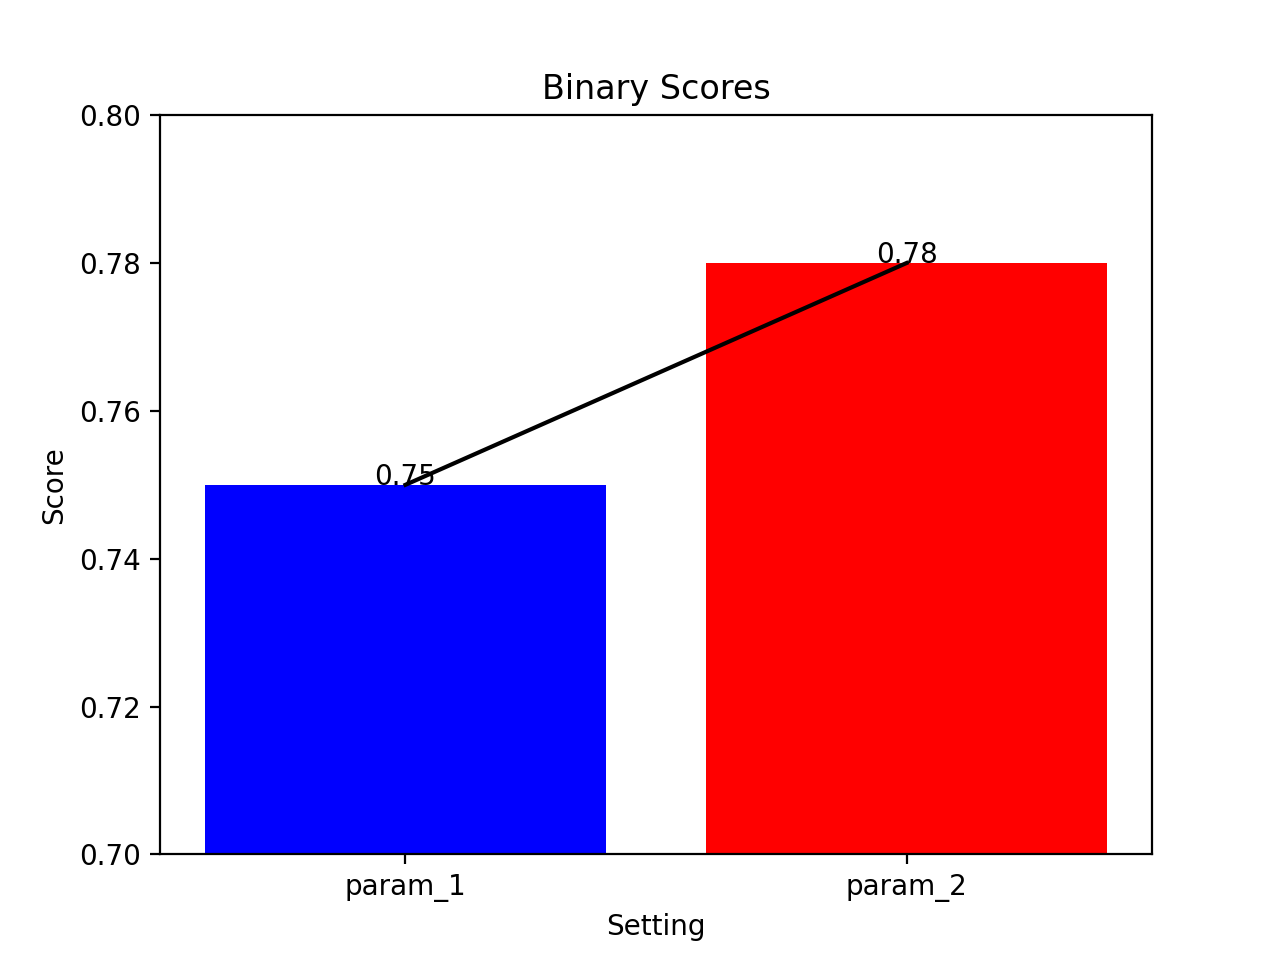

In [64]:
# for binary 
bi_score = [0.75, 0.78]
# bar plot for binary
plt.bar(['param_1', 'param_2'], bi_score, color = ['blue', 'red'])
# add line plot to show trend 
plt.plot(bi_score, color = 'black')
for i in range(2):
    plt.text(i, bi_score[i], round(bi_score[i], 3), ha = 'center')
plt.title('Binary Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
# adjust the y-axis
plt.ylim(0.7, 0.8)

## Entire Training Process

- table of metrics
- line plot to show the fluctuation of metrics from the baseline to the final model

### what the plot contains

- X-axis: Displays the number of iterations or epochs, representing the training progress from the start to the end.

- Y-axis: Shows the value of the metric being tracked, such as loss or accuracy. The scale depends on the metric values obtained, typically ranging from 0 to 1.

two options: 

1. 
- Lines: Each line represents a different metric, such as training loss, validation loss, training accuracy, or validation accuracy. The lines show how the metric changes over time during training.

- Legend: The legend includes entries for each metric, making it easier to identify which line corresponds to each metric.

2. 

- Line: A single line represents the metric being tracked, such as training loss, validation loss, training accuracy, or validation accuracy. The line shows how the metric changes over time during training.

- Line sections: Different sections of the line can be colored or styled differently to indicate different stages of training (aka different tuning parameters).

In [374]:
# option 2
def plot_hyperparameters_tuning(scores):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='step', y='test_score', data=scores, marker='o', color='gray')
    # add line for baseline
    plt.axhline(y=scores['test_score'].iloc[0], color='black', linestyle='--')
    # add line for final model
    plt.axhline(y=scores['test_score'].iloc[-2], color='black', linestyle='--')
    # add arrow to show improvement
    plt.annotate('', (scores['step'].iloc[1] - 0.8, scores['test_score'].iloc[-2]), 
                 (scores['step'].iloc[1] - 0.8 , scores['test_score'].iloc[0]), 
                 arrowprops = dict(facecolor='black', shrink=0.18, width=0.6))
    # add text to show improvement in percentage
    plt.text(scores['step'].iloc[2] + 0.1, 
             (scores['test_score'].iloc[-2] + scores['test_score'].iloc[0]) / 2, 
             f'The recall on test data has improved by {round(scores["test_score"].iloc[-2] - scores["test_score"].iloc[0], 3)*100}%', 
             ha='center',
             # bold the text
             fontweight='bold')
    # point to the base model 
    plt.text(scores['step'].iloc[0] + 0.85, 
             scores['test_score'].iloc[0] - 0.002, 
             f"Baseline recall = {round(scores['test_score'][0], 3)}", 
             ha='center', fontsize=11, fontweight='bold')
    # point to the final model
    plt.text(scores['step'].iloc[-2] + 0.5, 
             scores['test_score'].iloc[-2] + 0.001, 
             f"Final recall = {round(scores['test_score'][6], 3)}", 
             color = 'g', ha='center',fontsize=11,fontweight='bold')
  
    plt.suptitle(' The tuning process of hyperparameters for the MLP model',
                 x = 0.34, fontsize = 14)
    plt.title('                 The building block approach shows the improvement in recall on the test set.\nThe steps (1,2) and (2,3) show the most significant improvements.',
              x = 0.3,fontsize = 12, fontstyle='italic')
    plt.xlabel('Number of Hyperparameters Tuned', fontsize=12)
    # adjust x limit 
    plt.ylabel('Recall on test set',fontsize=12)
    plt.grid(False)
    plt.show()

In [375]:
results['test_score'] = results['Recall']

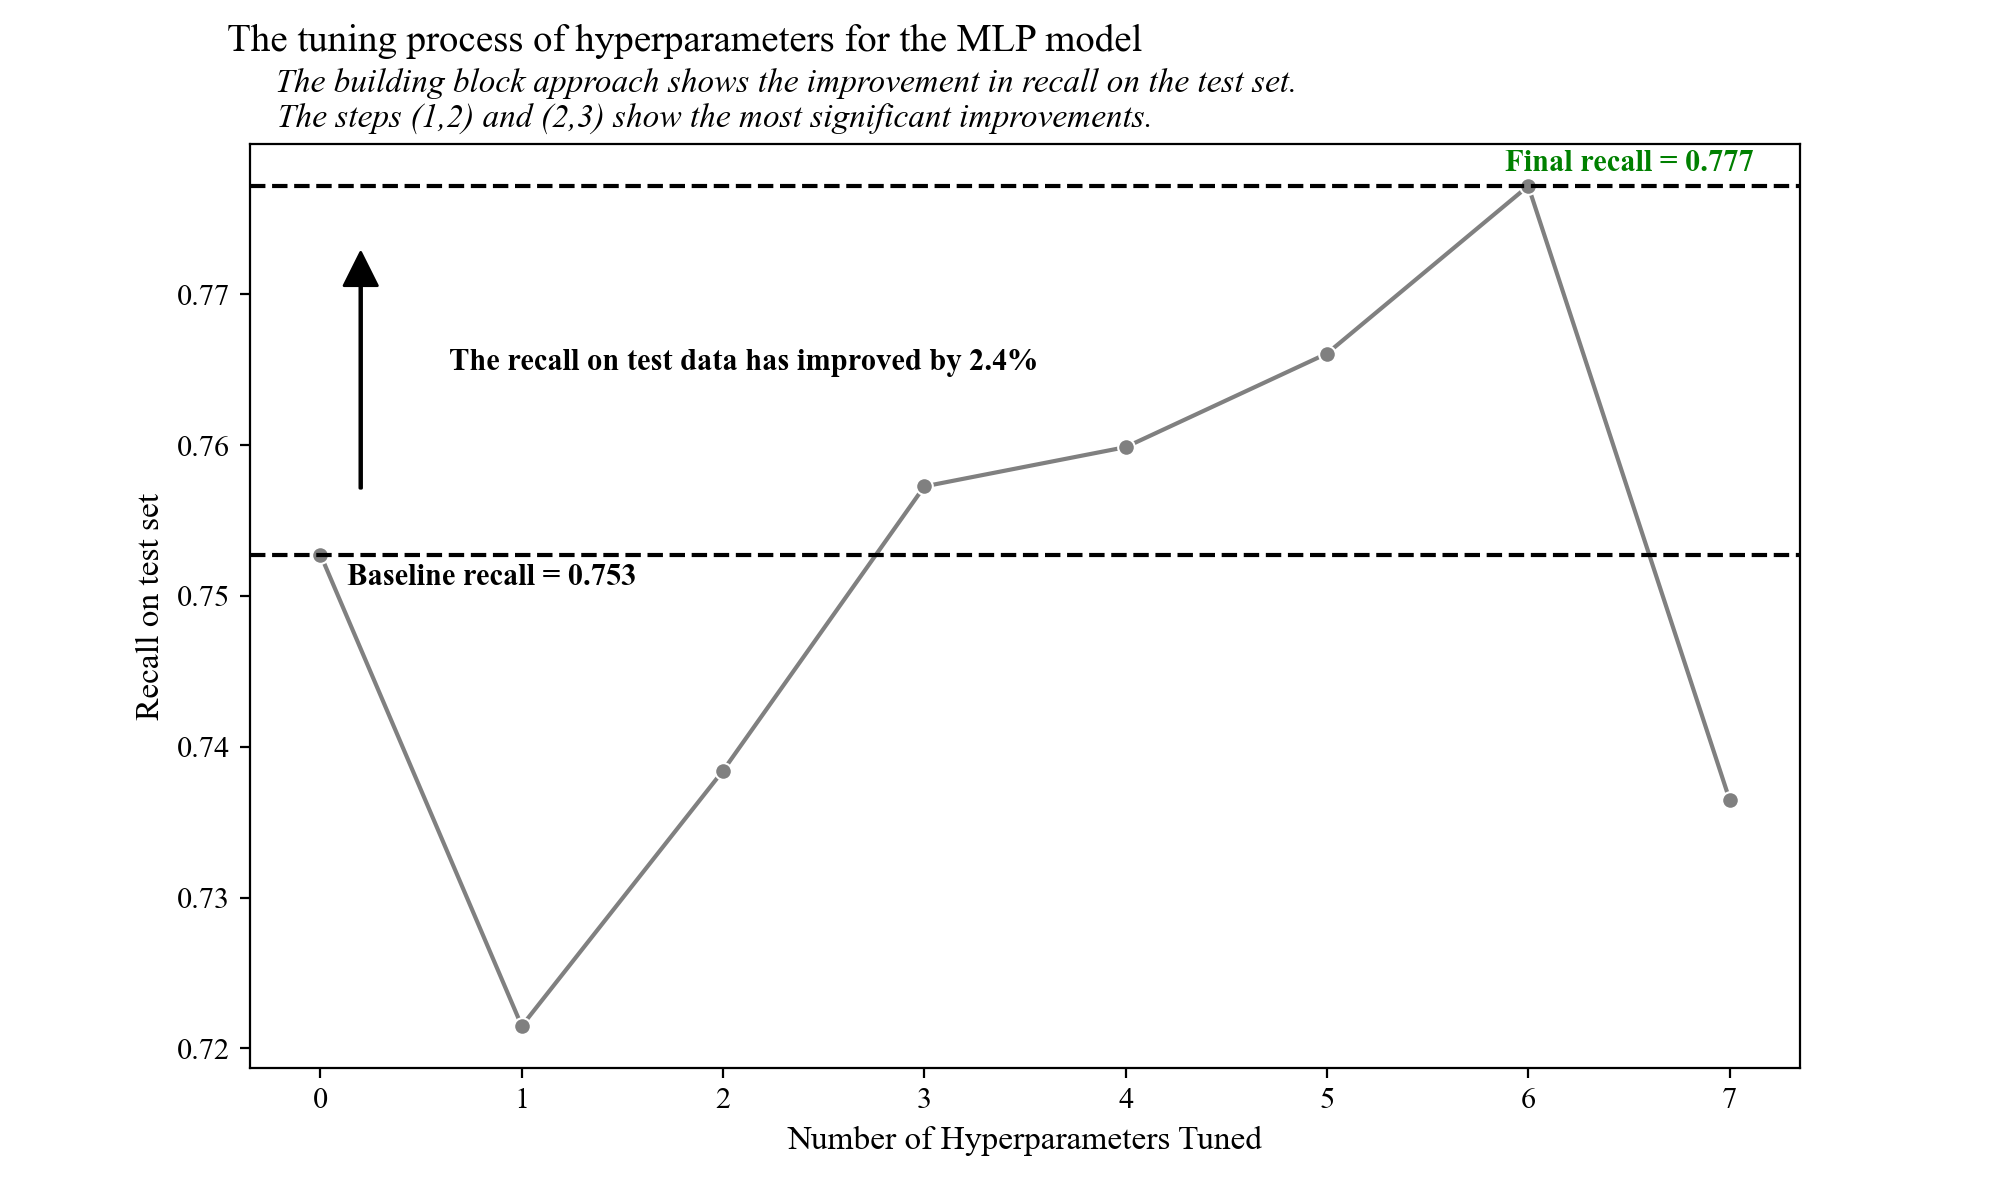

In [376]:
plot_hyperparameters_tuning(results)

In [427]:
with open(root_path + 'best_model_best_lego_7_3-Under_Sample_1:1_threshold_20.pkl', 'rb') as f:
    model_7 = pickle.load(f)


with open(root_path + 'best_model_best_params-Under_Sample_1:1_threshold_20.pkl', 'rb') as be:
    best_model = pickle.load(be)

In [428]:
# import test data
y_test = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_y_test.parquet')
X_test = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_x_test.parquet')  
X_train = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_x_train.parquet')

# drop the index column
X_train.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)


X_test.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)
y_test.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)

y_test = y_test.to_numpy().ravel()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# predict on test data
y_pred = model_7.predict(X_test_scaled)

# get the probability of the positive class
y_prob = model_7.predict_proba(X_test)[:, 1]

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names


In [430]:
# predict the best model
y_pred_best = best_model.predict(X_test_scaled)
# get the probability of the positive class
y_prob_best = best_model.predict_proba(X_test)[:, 1]


/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names


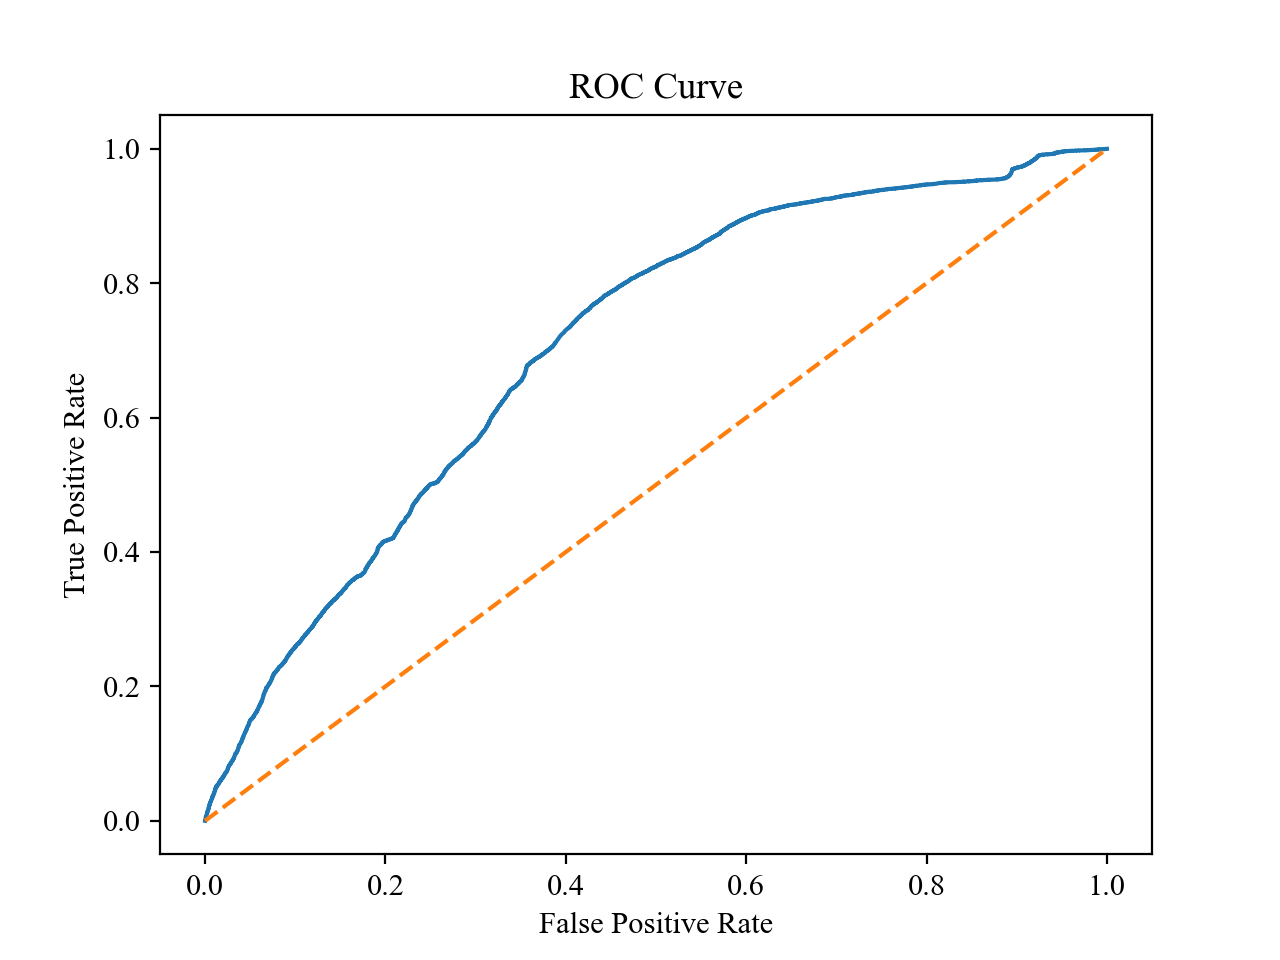

In [429]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


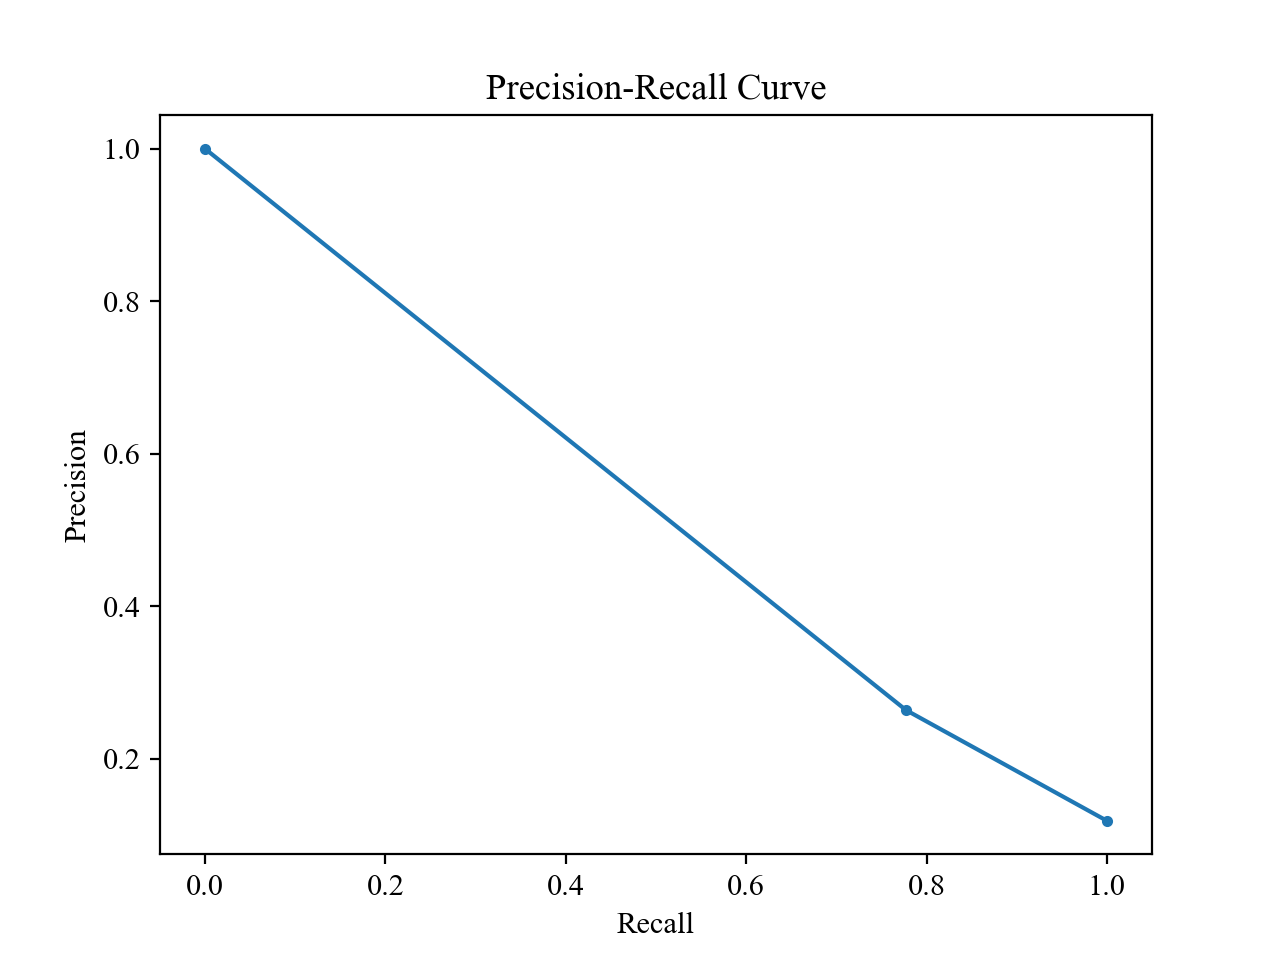

In [421]:
# pr curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

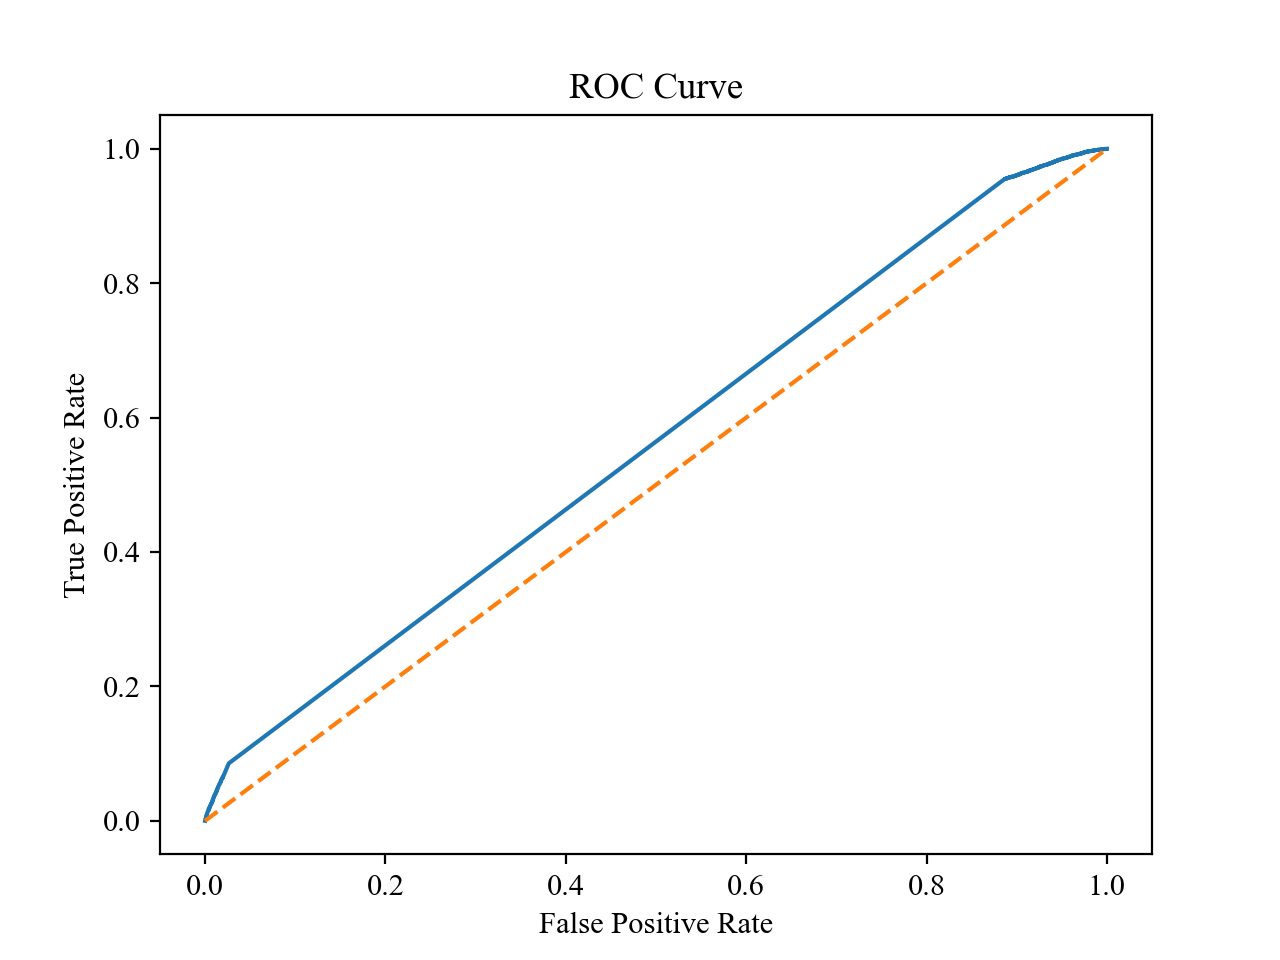

In [431]:
# roc curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)

plt.plot(fpr_best, tpr_best)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


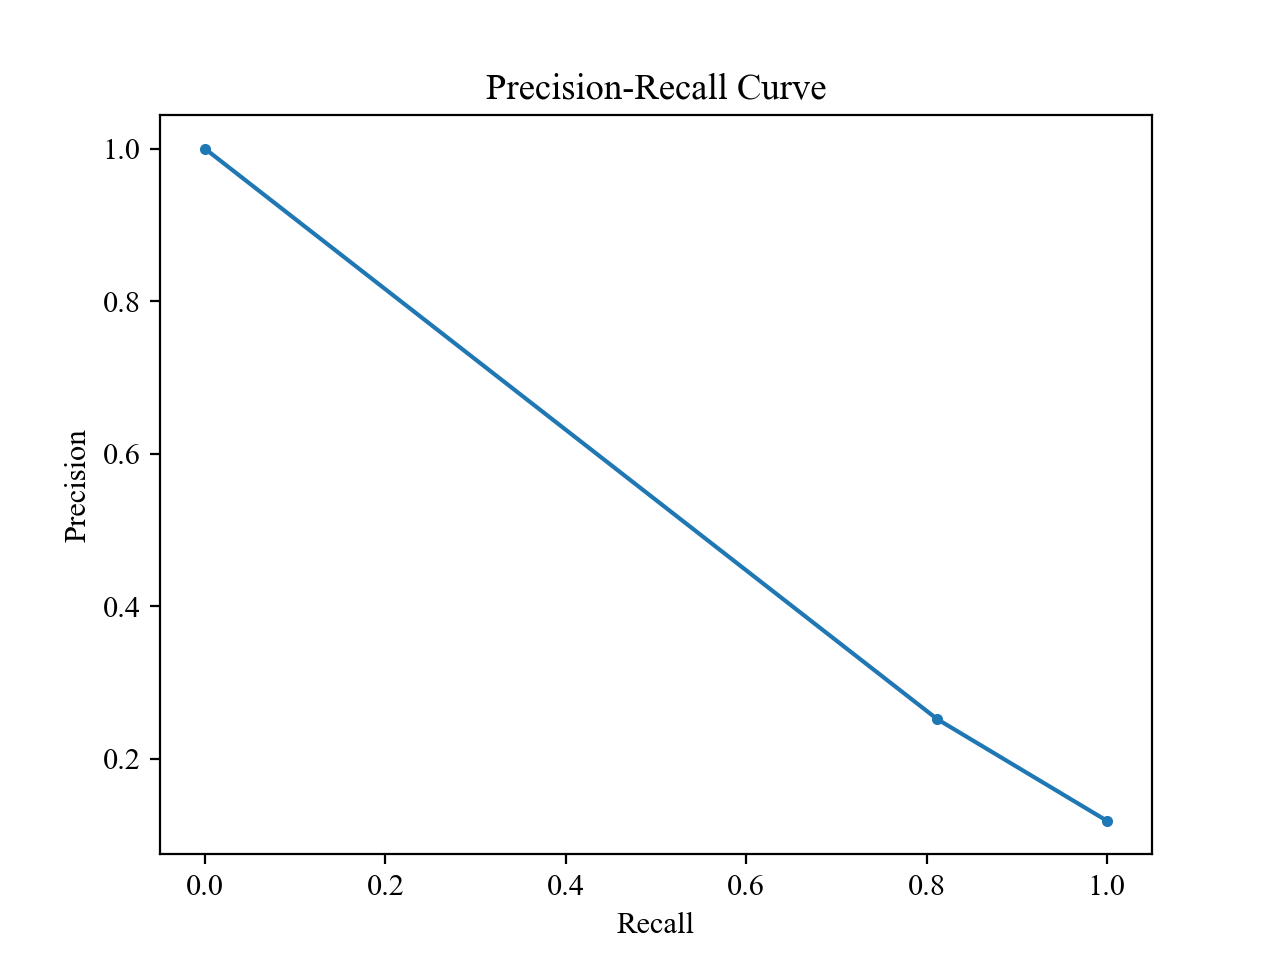

In [434]:
# pr curve for the best model
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, y_pred_best)

plt.plot(recall_best, precision_best, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
